In [1]:
import pandas as pd
import numpy  as np 

import matplotlib.pyplot as plt
import statistics as stat

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting seed

SEED = 101
np.random.seed(SEED)

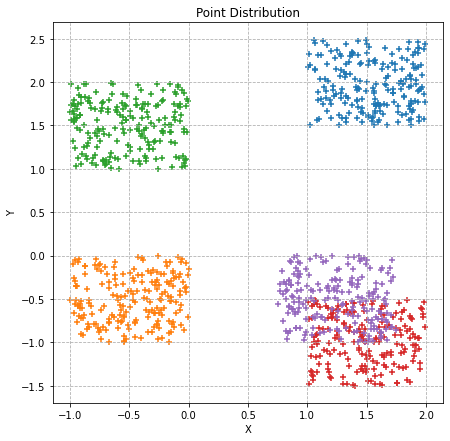

In [4]:
# Toy Dataset creation

## Creating a toy dataset

rand_values = np.random.rand(1000)

cluster_1 = np.array(list(zip( 1  + np.random.rand(200), 1.5 + np.random.rand(200))))
cluster_2 = np.array(list(zip( -1 + np.random.rand(200),  -1 + np.random.rand(200))))
cluster_3 = np.array(list(zip( -1 + np.random.rand(200),   1 + np.random.rand(200))))
cluster_4 = np.array(list(zip(  1 + np.random.rand(200),-1.5 + np.random.rand(200))))
cluster_5 = np.array(list(zip(.75 + np.random.rand(200),  -1 + np.random.rand(200))))

clusters = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

## Plotting the toy dataset

fig = plt.figure(figsize=(7, 7))
for cluster in clusters:
    plt.scatter(cluster[:,0], cluster[:,1], marker='+')
plt.grid(ls='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Distribution');

## Creating the toy dataframe

toy_df = pd.DataFrame()
for cluster_id, cluster in enumerate(clusters):
    sub_df = pd.DataFrame(cluster, columns=['x', 'y'])
    sub_df['cluster_id'] = cluster_id + 1
    toy_df = pd.concat([toy_df, sub_df])

In [5]:
# K-Nearest Neighbour Algorithm

## Calculating euclidean distance
def euclidean_distance(p1, p2):
    distance = np.sqrt(np.sum((p1-p2)**2))
    return distance

## Finding the highest occuring class label of the closest k neighbours
def find_most_common_class_label(X_train, y_train, pt_test, k_neighbors):
    distances = [euclidean_distance(pt_test, pt_train) for pt_train in X_train]
    k_nearest = np.argsort(distances)[:k_neighbors]
    k_nearest_labels = [y_train[x] for x in k_nearest]
    most_common = stat.mode(k_nearest_labels)
    
    return most_common

## Producing required predictions
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = [find_most_common_class_label(X_train, y_train, pt_test, k) for pt_test in X_test]
    return predictions

In [6]:
# Train Test Split

X = toy_df.drop(['cluster_id'], axis=1)
y = toy_df['cluster_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [7]:
# Coding the confusion matrix function

import seaborn as sns

def plot_confusion_matrix(y_train, y_test, y_predicted):
    labels = list(np.unique(y_train))
    cm = confusion_matrix(y_test, y_predicted, labels=labels)
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels, rotation=0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

In [8]:
%%time

# Our K-NN algorithm

m_knn_y_predicted = knn_predict(X_train.values, y_train.values, X_test.values, k=3)
m_knn_score = accuracy_score(y_test, m_knn_y_predicted)
print(f"Our KNN Test Set Accuracy Score: {m_knn_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our KNN Test Set Accuracy Score: 0.932
Training Data Count: 750, %Training Data: 75.00
Test Data Count: 250, %Test Data: 25.00
CPU times: user 1.34 s, sys: 888 µs, total: 1.34 s
Wall time: 1.34 s


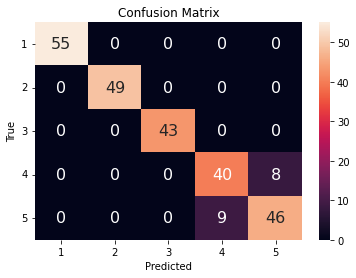

In [9]:
plot_confusion_matrix(y_train, y_test, m_knn_y_predicted)

Text(0.5, 0, 'X')

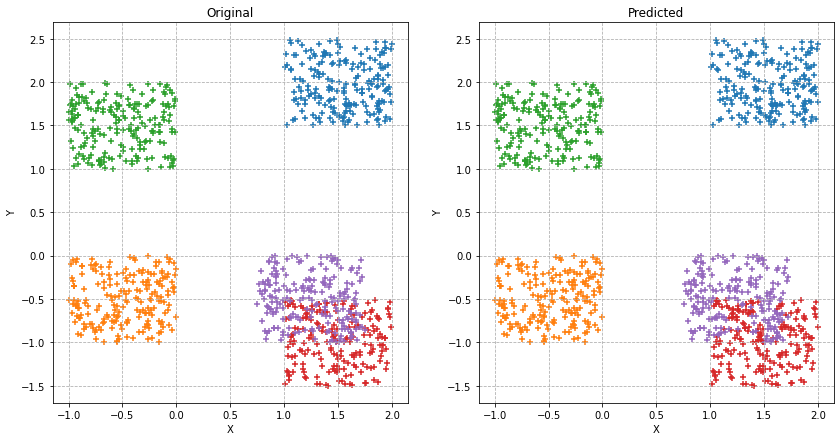

In [10]:
# Plotting Original vs Predicted for m_knn

m_knn_y_train_predicted = knn_predict(X_train.values, y_train.values, X_train.values, k=3)

train_df = X_train
train_df['cluster_id'] = m_knn_y_train_predicted

test_df = X_test
test_df['cluster_id']  = m_knn_y_predicted

main_df = pd.concat([X_train, X_test])

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for _, data in toy_df.groupby('cluster_id'):
    axs[0].scatter(data['x'], data['y'], marker='+')
axs[0].set_title("Original")
axs[0].grid(ls='--')
axs[0].set_ylabel('Y')
axs[0].set_xlabel('X')

for _, data in main_df.groupby('cluster_id'):
    axs[1].scatter(data['x'], data['y'], marker='+')
axs[1].set_title("Predicted")
axs[1].grid(ls='--')
axs[1].set_ylabel('Y')
axs[1].set_xlabel('X')

In [11]:
%%time

# Sci-Kit Learn's KNN Algorithm

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
sklearn_y_predicted = knn_clf.predict(X_test)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's KNN Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's KNN Test Set Accuracy Score: 0.928
Training Data Count: 750, %Training Data: 75.00
Test Data Count: 250, %Test Data: 25.00
CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 11.2 ms


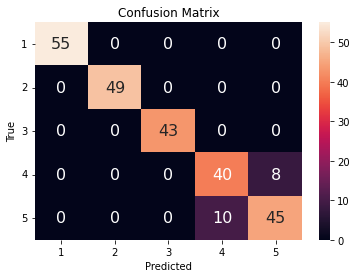

In [12]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)

In [13]:
# Loading Iris dataset

In [14]:
from sklearn.datasets import load_iris

irisData = load_iris()
 
X = irisData.data
y = irisData.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [15]:
%%time

# Our K-NN algorithm

m_knn_y_predicted = knn_predict(X_train, y_train, X_test, k=3)
m_knn_score = accuracy_score(y_test, m_knn_y_predicted)
print(f"Our KNN Test Set Accuracy Score: {m_knn_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our KNN Test Set Accuracy Score: 1.000
Training Data Count: 112, %Training Data: 74.67
Test Data Count: 38, %Test Data: 25.33
CPU times: user 33.3 ms, sys: 0 ns, total: 33.3 ms
Wall time: 33.1 ms


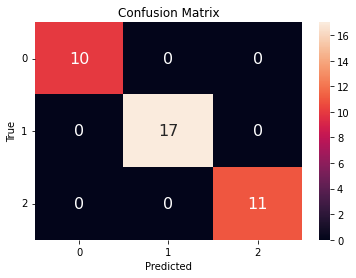

In [16]:
plot_confusion_matrix(y_train, y_test, m_knn_y_predicted)

In [17]:
%%time

# Sci-Kit Learn's KNN Algorithm

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
sklearn_y_predicted = knn_clf.predict(X_test)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's KNN Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's KNN Test Set Accuracy Score: 1.000
Training Data Count: 112, %Training Data: 74.67
Test Data Count: 38, %Test Data: 25.33
CPU times: user 0 ns, sys: 2.38 ms, total: 2.38 ms
Wall time: 2.15 ms


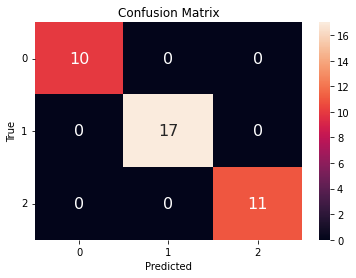

In [18]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)

In [19]:
# Loading Car Dataset

In [20]:
carData = pd.read_csv('./car.data', encoding='utf-8', header=None)

carData.columns = ['buying', 'maintainence', 'doors', 'persons', 'lug_boot', 'safety', 'class']
carData = carData.replace({"class":{"unacc": 4, "acc": 3,'good': 2,'vgood':1}})

X = pd.get_dummies(carData.drop('class', axis=1))
y = carData['class']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [21]:
%%time

# Our K-NN algorithm

m_knn_y_predicted = knn_predict(X_train.values, y_train.values, X_test.values, k=3)
m_knn_score = accuracy_score(y_test, m_knn_y_predicted)
print(f"Our KNN Test Set Accuracy Score: {m_knn_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our KNN Test Set Accuracy Score: 0.831
Training Data Count: 1296, %Training Data: 75.00
Test Data Count: 432, %Test Data: 25.00
CPU times: user 3.94 s, sys: 488 µs, total: 3.94 s
Wall time: 3.94 s


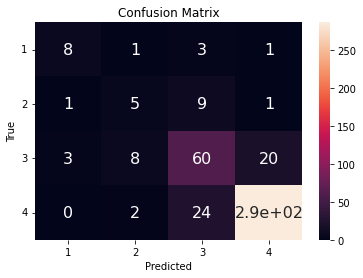

In [22]:
plot_confusion_matrix(y_train, y_test, m_knn_y_predicted)

In [23]:
%%time

# Sci-Kit Learn's KNN Algorithm

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train.values, y_train.values)
sklearn_y_predicted = knn_clf.predict(X_test.values)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's KNN Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's KNN Test Set Accuracy Score: 0.831
Training Data Count: 1296, %Training Data: 75.00
Test Data Count: 432, %Test Data: 25.00
CPU times: user 28.3 ms, sys: 60 µs, total: 28.4 ms
Wall time: 28.1 ms


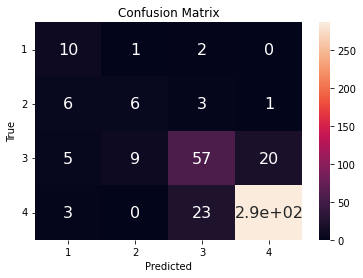

In [24]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)